# Get dark matter flux for annihilation and decay of dark matter

So, we can now compute the gamma-ray flux for particular targets. This notebook shows how to accomplish that by using the ```dmspectrum``` class

As usual, we start by importing the required packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ctadmtool.dmspectrum.dmspectra import dmspectrum

## Properties of the dark matter candidate and the target

First, we define some parameters and properties related to our dark matter candidate and the target of interest

In [2]:
mass    = 1.e+4
z       = 0.017284
channel = 'W'
emin    = 30.0
emax    = mass

sigmav  = 3.e-26
jfactor = 10**(18.48)

lifetime = 1.e+30
dfactor  = 1.59e19

## Getting the spectrum

We create an instance of the ```dmspectrum``` class. We can change the properties to compute either annihilation or decay gamma-ray spectrum. In this case, we will use the full contructor to check all the parameters of the class.

In [3]:
dmspec = dmspectrum(mass, emin, emax, channel, z, process='anna',\
        eblmod='franceschini2017', has_EW=True, epoints=100)

We get the differential spectrum $dN/dE$ for the annihilation case. To compute the gamma-ray flux, we will use:

$\frac{d\Phi}{dE} = \frac{\langle\sigma_{\chi}v\rangle}{8\pi m_{\chi}^2}~\frac{dN}{dE}\times J_\text{factor}$

In [4]:
dnde   = dmspec.spectra()
dphide = sigmav * dnde * jfactor / (8 * np.pi * mass**2)

For decay, we can do exactly the same. The differential gamma-ray flux is obtained by using:

$\frac{d\Phi}{dE} = \frac{1}{4\pi m_{\chi}\tau_{\chi}}~\frac{dN}{dE}\times D_\text{factor}$

We need to change the process of the ```dmspec``` instance

In [5]:
dmspec.process = 'decay'
dmspec.emax    = mass/2.

dnde_dec   = dmspec.spectra()
dphide_dec = dnde_dec * dfactor / (4 * np.pi * mass * lifetime)

And, we can plot the spectrum for this particular case:

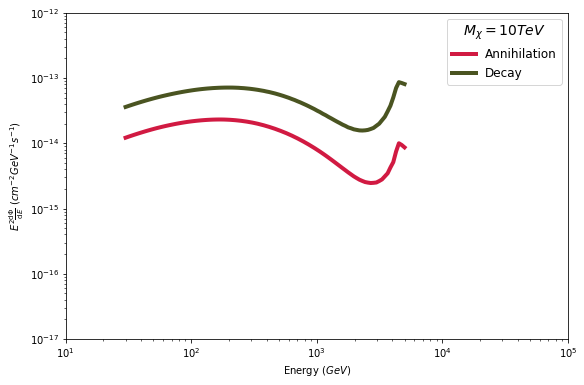

In [6]:
fig, ax  = plt.subplots(figsize=(9, 6))
energies = dmspec.energy

ax.plot(energies, energies**2*dphide, color=(0.82,0.10,0.26), lw=4, label='Annihilation')
ax.plot(energies, energies**2*dphide_dec, color=(0.29,0.33,0.13), lw=4, label='Decay')

ax.set_xlim(1.e+1, 1.e+5)
ax.set_ylim(1.e-17, 1.e-12)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Energy $(GeV)$')
ax.set_ylabel('$E^{2}\\frac{\\mathrm{d}\\Phi}{\\mathrm{d}E}$ ($cm^{-2} GeV^{-1} s^{-1}$)')

ax.legend(loc='best', prop={'size':12}, title='$M_{\\chi}=10{TeV}$', title_fontsize=14)
pfile = 'DMFlux10TeVW.png'
plt.savefig(pfile)


## Comparison with CLUMPY (Decay)

Now, we can compare the spectrum obained with ```dmspectrum``` class and **Clumpy**. You can follow the instructions in [Clumpy Documentation](https://clumpy.gitlab.io/CLUMPY/physics_1Dtoflux.html). Shortly:

```
$ $CLUMPY/bin/clumpy -z --gPP_BR=0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0 --gPP_FLAG_SPECTRUMMODEL=kCIRELLI11_EW --gPP_DM_DECAY_LIFETIME=1.e+30 --gPP_DM_IS_ANNIHIL_OR_DECAY=0 --gPP_DM_MASS_GEV=1.e+4 --gSIM_FLUX_EMIN_GEV=30 --gSIM_FLUX_EMAX_GEV=0.49e+4 --gSIM_FLUX_FLAG_FINALSTATE=kGAMMA --gSIM_NX=100 --gSIM_XPOWER=2 --gSIM_IS_ASTRO_OR_PP_UNITS=0 --gSIM_JFACTOR=1.59e+19 --gSIM_REDSHIFT=0.017824 --gSIM_EPS=0.01 --gSIM_OUTPUT_DIR=./ -p --gEXTRAGAL_FLAG_ABSORPTIONPROFILE=kDOMINGUEZ11_REF --gSIM_IS_WRITE_ROOTFILES=0
```

I edited the output file from **Clumpy** and the header looks like:

            # E   E2dphide
            
Please note that the output file from **Clumpy** has *MeV* as the unit for energies

In [7]:
# Load data from clumpy
dphide_clumpy = np.genfromtxt('spectra_CIRELLI11_EW_GAMMA_m10000.txt', names=True)
print(dphide_clumpy['E2dphide'])

[3.50e-11 3.63e-11 3.75e-11 3.88e-11 4.01e-11 4.15e-11 4.28e-11 4.41e-11
 4.55e-11 4.68e-11 4.82e-11 4.95e-11 5.09e-11 5.22e-11 5.35e-11 5.48e-11
 5.60e-11 5.73e-11 5.85e-11 5.98e-11 6.10e-11 6.21e-11 6.33e-11 6.43e-11
 6.54e-11 6.64e-11 6.73e-11 6.82e-11 6.90e-11 6.97e-11 7.03e-11 7.09e-11
 7.14e-11 7.19e-11 7.22e-11 7.25e-11 7.27e-11 7.28e-11 7.28e-11 7.26e-11
 7.24e-11 7.20e-11 7.16e-11 7.10e-11 7.05e-11 6.97e-11 6.88e-11 6.79e-11
 6.68e-11 6.57e-11 6.44e-11 6.31e-11 6.16e-11 6.02e-11 5.85e-11 5.69e-11
 5.51e-11 5.33e-11 5.15e-11 4.95e-11 4.77e-11 4.57e-11 4.39e-11 4.19e-11
 4.00e-11 3.81e-11 3.62e-11 3.43e-11 3.24e-11 3.07e-11 2.88e-11 2.73e-11
 2.57e-11 2.42e-11 2.28e-11 2.15e-11 2.03e-11 1.91e-11 1.81e-11 1.70e-11
 1.63e-11 1.56e-11 1.51e-11 1.47e-11 1.44e-11 1.44e-11 1.44e-11 1.47e-11
 1.51e-11 1.61e-11 1.71e-11 1.91e-11 2.13e-11 2.54e-11 3.06e-11 3.86e-11
 5.08e-11 5.80e-11 3.88e-11 1.77e-11]


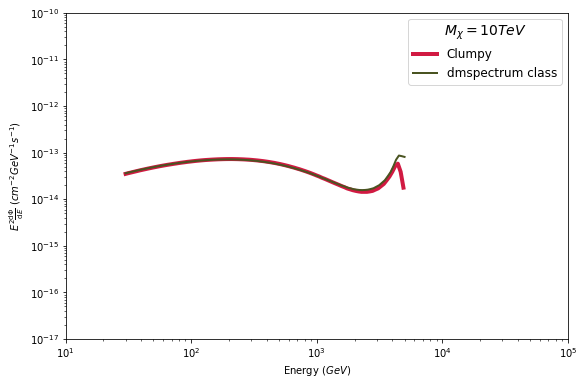

In [8]:
fig, ax  = plt.subplots(figsize=(9, 6))
energies = dmspec.energy

ax.plot(dphide_clumpy['E']*1.e-3, dphide_clumpy['E2dphide']*1.e-3, color=(0.82,0.10,0.26), lw=4, label='Clumpy')
ax.plot(energies, energies**2*dphide_dec, color=(0.29,0.33,0.13), lw=2, label='dmspectrum class')

ax.set_xlim(1.e+1, 1.e+5)
ax.set_ylim(1.e-17, 1.e-10)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Energy $(GeV)$')
ax.set_ylabel('$E^{2}\\frac{\\mathrm{d}\\Phi}{\\mathrm{d}E}$ ($cm^{-2} GeV^{-1} s^{-1}$)')

ax.legend(loc='best', prop={'size':12}, title='$M_{\\chi}=10{TeV}$', title_fontsize=14)
pfile = 'DMFlux10TeVWComparisonDecay.png'
plt.savefig(pfile)
